[INFO] NVDA: Data found up to 2025-12-02. Checking updates from 2025-12-03...
[INFO] NVDA is already up to date.
[INFO] AAPL: Data found up to 2025-12-02. Checking updates from 2025-12-03...
[INFO] AAPL is already up to date.
[INFO] SXR8.DE: Data found up to 2025-12-02. Checking updates from 2025-12-03...
[INFO] SXR8.DE is already up to date.
[INFO] EUNL.DE: Data found up to 2025-12-02. Checking updates from 2025-12-03...
[INFO] EUNL.DE is already up to date.
[INFO] VGWE.DE: Data found up to 2025-12-02. Checking updates from 2025-12-03...
[INFO] VGWE.DE is already up to date.
Running Max Sharpe Strategy...
[INFO] Starting Backtest: 63 rebalance events...


c:\Users\ASUS\Desktop\PyQuant-PMS\src\backtest.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rebalance_dates = self.prices.resample(rebalance_freq).last().index


Running Min Volatility Strategy...
[INFO] Starting Backtest: 63 rebalance events...


c:\Users\ASUS\Desktop\PyQuant-PMS\src\backtest.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rebalance_dates = self.prices.resample(rebalance_freq).last().index


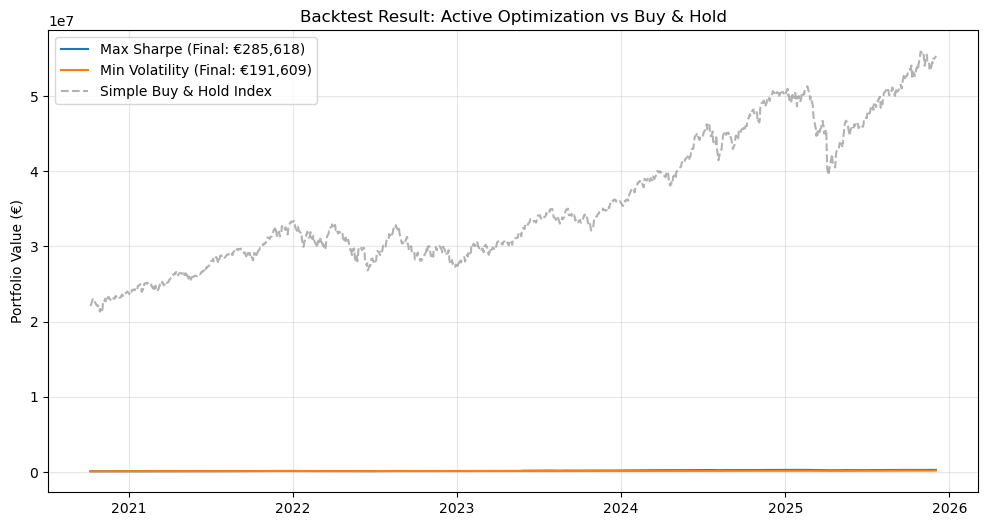

<Figure size 1200x600 with 0 Axes>

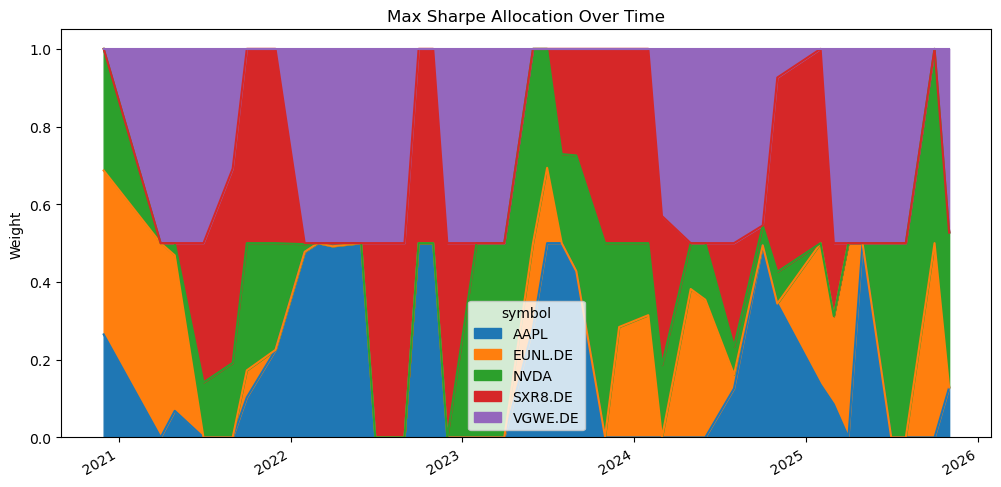

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2
sys.path.append(os.path.abspath('..'))

from src.database import MarketDB
from src.backtest import BacktestEngine

# 1. Load Data
db = MarketDB()
# Using your portfolio: Tech (NVDA, AAPL) + Core (SXR8, EUNL) + Bonds (VGWE)
tickers = ["NVDA", "AAPL", "SXR8.DE", "EUNL.DE", "VGWE.DE"] 
db.update_tickers(tickers)
prices = db.get_prices(tickers)

# 2. Initialize Backtester
# We start with 100k
bt = BacktestEngine(prices, initial_capital=100000)

# 3. Run Strategy: Max Sharpe (Rebalance Monthly)
print("Running Max Sharpe Strategy...")
res_sharpe = bt.run(rebalance_freq='M', lookback_window=126, strategy='max_sharpe')

# 4. Run Strategy: Min Volatility (Rebalance Monthly)
print("Running Min Volatility Strategy...")
res_vol = bt.run(rebalance_freq='M', lookback_window=126, strategy='min_vol')

# 5. Benchmark: Buy & Hold (Equal Weight initially)
# Simple normalization to compare
benchmark = prices.mean(axis=1)
benchmark = benchmark / benchmark.iloc[0] * 100000
benchmark = benchmark.loc[res_sharpe['equity_curve'].index] # Align dates

# 6. Plot Equity Curves
plt.figure(figsize=(12, 6))
plt.plot(res_sharpe['equity_curve'], label=f"Max Sharpe (Final: €{res_sharpe['final_value']:,.0f})")
plt.plot(res_vol['equity_curve'], label=f"Min Volatility (Final: €{res_vol['final_value']:,.0f})")
plt.plot(benchmark, label="Simple Buy & Hold Index", linestyle='--', color='gray', alpha=0.6)

plt.title("Backtest Result: Active Optimization vs Buy & Hold")
plt.ylabel("Portfolio Value (€)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 7. Plot Weights (Stacked Area) - To see how allocation changed
plt.figure(figsize=(12, 6))
res_sharpe['weights'].plot.area(figsize=(12,6), title="Max Sharpe Allocation Over Time")
plt.ylabel("Weight")
plt.show()